In [14]:
import gym
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer
import math
import seaborn as sns

env = gym.make('CartPole-v1', render_mode="rgb_array")
env.action_space.seed(42)

observation, info = env.reset(seed=42)

for _ in range(1):
    observation, reward, terminated, truncated, info = env.step(env.action_space.sample())

    if terminated or truncated:
        observation, info = env.reset()

env.close()

/Users/bastianchuttarsing/Documents/ReinforcmentLearning_project1/.venv/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [15]:
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

Action Space Discrete(2)
State Space Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)


In [17]:
n_bins = ( 6, 6, 12 )
lower_bounds = [ env.observation_space.low[0],env.observation_space.low[2], -math.radians(50) ]
upper_bounds = [ env.observation_space.high[0], env.observation_space.high[2], math.radians(50) ]

def discretizer( position , __ , angle, pole_velocity ):
    """Convert continues state intro a discrete state"""
    est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
    est.fit([lower_bounds, upper_bounds ])
    return tuple(map(int,est.transform([[position, angle, pole_velocity]])[0]))

state = env.step(0)
print(discretizer( state[0][0], state[0][1], state[0][2], state[0][3]))

(3, 3, 10)


In [18]:
q_table = np.zeros(n_bins + (env.action_space.n,))
q_table.shape

(6, 6, 12, 2)

In [19]:
%%time
"""Training the agent"""

import random
from IPython.display import clear_output

# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1



# For plotting metrics
all_epochs = []
all_rewards = []

for i in range(1, 5000):
    state = env.reset()
    state = discretizer(state[0][0], state[0][1], state[0][2], state[0][3])
    
    epochs = 1
    penalties = 0
    reward_sum = 0
    terminated = False
    truncated = False

    while not terminated or not truncated:

        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values

        next_state, reward, terminated, truncated, info = env.step(action) 
        
        next_state = discretizer(next_state[0], next_state[1], next_state[2], next_state[3])

        

        old_value =  q_table[state][action]
        next_max = np.max(q_table[next_state])
        
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state][action] = new_value    

        state = next_state
        epochs += 1

        reward_sum += reward



    all_rewards.append(reward_sum)
    all_epochs.append(i)
    
    env.reset()
    if i % 100 == 0:

        #print(f"reward mean: {reward_mean/epochs}")
        clear_output(wait=True)
        print(f"Episode: {i}")
        print(f"reward: {reward}")

    #reward_mean = 0
print("Training finished.\n")
env.close()

Episode: 4900
reward: 0.0


/Users/bastianchuttarsing/Documents/ReinforcmentLearning_project1/.venv/lib/python3.9/site-packages/gym/envs/classic_control/cartpole.py:177: UserWarning: WARN: You are calling 'step()' even though this environment has already returned terminated = True. You should always call 'reset()' once you receive 'terminated = True' -- any further steps are undefined behavior.
  logger.warn(
/Users/bastianchuttarsing/Documents/ReinforcmentLearning_project1/.venv/lib/python3.9/site-packages/gym/envs/classic_control/cartpole.py:177: UserWarning: WARN: You are calling 'step()' even though this environment has already returned terminated = True. You should always call 'reset()' once you receive 'terminated = True' -- any further steps are undefined behavior.
  logger.warn(
/Users/bastianchuttarsing/Documents/ReinforcmentLearning_project1/.venv/lib/python3.9/site-packages/gym/envs/classic_control/cartpole.py:177: UserWarning: WARN: You are calling 'step()' even though this environment has already ret

Training finished.

CPU times: user 9min 51s, sys: 12.7 s, total: 10min 4s
Wall time: 9min 52s


/Users/bastianchuttarsing/Documents/ReinforcmentLearning_project1/.venv/lib/python3.9/site-packages/gym/envs/classic_control/cartpole.py:177: UserWarning: WARN: You are calling 'step()' even though this environment has already returned terminated = True. You should always call 'reset()' once you receive 'terminated = True' -- any further steps are undefined behavior.
  logger.warn(
/Users/bastianchuttarsing/Documents/ReinforcmentLearning_project1/.venv/lib/python3.9/site-packages/gym/envs/classic_control/cartpole.py:177: UserWarning: WARN: You are calling 'step()' even though this environment has already returned terminated = True. You should always call 'reset()' once you receive 'terminated = True' -- any further steps are undefined behavior.
  logger.warn(


In [20]:
#save q_table to file 
np.save('q_table_6_6_12_5k.npy', q_table)

In [21]:
#load q_table from file
q_table = np.load('q_table_6_6_12_5k.npy')
q_table

array([[[[0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00]],

        [[0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00],
         

<Axes: >

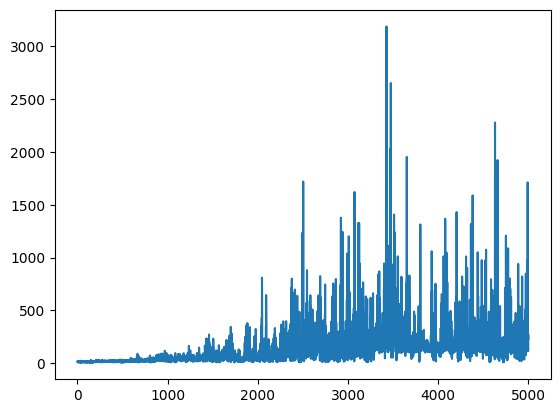

In [22]:
# plot seaborn of all_rewards and all_epochs
sns.lineplot(x=all_epochs, y=all_rewards)


In [24]:
"""Evaluate agent's performance after Q-learning"""
env = gym.make("CartPole-v1", render_mode="rgb_array")

total_epochs, total_reward = 0, 0
episodes = 100

for _ in range(episodes):
    state = env.reset()
    state = discretizer(state[0][0], state[0][1], state[0][2], state[0][3])
    
    epochs, penalties, reward = 0, 0, 0
    
    done = False
    
    while not done:
        #print(state)
        action = np.argmax(q_table[state])
        #action = env.action_space.sample() # random action
        state, reward, done, done, info = env.step(action)
        state = discretizer(state[0], state[1], state[2], state[3])

        if reward == 1:
            penalties += 1

        epochs += 1

    total_reward += penalties
    total_epochs += epochs
    env.reset()
env.close()
print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average rewards per episode: {total_reward / episodes}")

/Users/bastianchuttarsing/Documents/ReinforcmentLearning_project1/.venv/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
/Users/bastianchuttarsing/Documents/ReinforcmentLearning_project1/.venv/lib/python3.9/site-packages/gym/envs/classic_control/cartpole.py:177: UserWarning: WARN: You are calling 'step()' even though this environment has already returned terminated = True. You should always call 'reset()' once you receive 'terminated = True' -- any further steps are undefined behavior.
  logger.warn(
/Users/bastianchuttarsing/Documents/ReinforcmentLearning_project1/.venv/lib/python3.9/site-packages/gym/envs/classic_control/cartpole.py:177: UserWarning: WARN: You are calling 'step()' even though this environment has already returned terminated = True. You should always call 'reset()' once you receive 'terminated = True' -- any 

Results after 100 episodes:
Average timesteps per episode: 500.0
Average rewards per episode: 465.9


: 